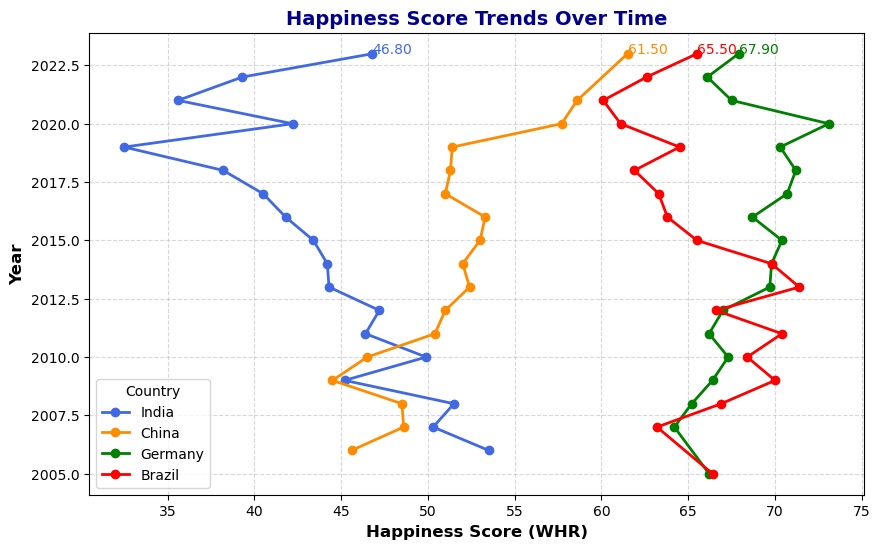

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = "hapiscore_whr.csv"  
df_happiness = pd.read_csv(file_path)
if "country" not in df_happiness.columns:
    raise ValueError("The dataset does not have a 'country' column. Please check the CSV file.")
df_melted = df_happiness.melt(id_vars=["country"], var_name="Year", value_name="Happiness Score")
df_melted["Year"] = pd.to_numeric(df_melted["Year"], errors="coerce")
df_melted = df_melted.dropna()
selected_countries = ["United States", "India", "China", "Germany", "Brazil"]  
valid_countries = df_melted["country"].unique()
selected_countries = [c for c in selected_countries if c in valid_countries]
if not selected_countries:
    raise ValueError("None of the selected countries are found in the dataset. Please check the names.")
plt.figure(figsize=(10, 6))
colors = ["royalblue", "darkorange", "green", "red", "purple"]
for country, color in zip(selected_countries, colors):
    country_data = df_melted[df_melted["country"] == country]
    if country_data.empty:
        print(f"Warning: No data found for {country}. Skipping...")
        continue
    plt.plot(country_data["Happiness Score"], country_data["Year"], 
             marker="o", linestyle="-", linewidth=2, markersize=6, 
             label=country, color=color)
    latest_year = country_data["Year"].max()
    latest_score = country_data[country_data["Year"] == latest_year]["Happiness Score"].values[0]
    plt.text(latest_score, latest_year, f"{latest_score:.2f}", fontsize=10, color=color, ha="left")
plt.xlabel("Happiness Score (WHR)", fontsize=12, fontweight="bold")
plt.ylabel("Year", fontsize=12, fontweight="bold")
plt.title("Happiness Score Trends Over Time", fontsize=14, fontweight="bold", color="darkblue")
plt.legend(title="Country", loc="best", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()
